In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

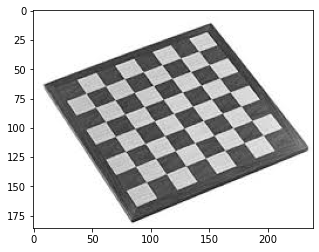

In [31]:
img = cv2.imread('chess_board_2.jpeg',0)
height=img.shape[0]
width=img.shape[1]
img = img[3:height-10, 5:width-10]
plt.imshow(img,cmap='gray')
height, width = img.shape

(188, 241)


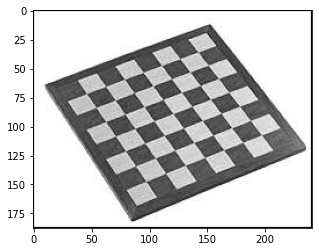

In [32]:
#padding
img1 = np.zeros((height+2,width+2))
img1[1:height+1,1:width+1] = img
plt.imshow(img1,cmap='gray')
print(img1.shape)


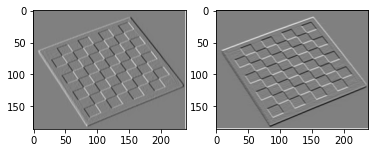

In [33]:
Ix = np.empty(shape= img.shape, dtype='float')
Iy = np.empty(shape= img.shape, dtype='float')
Kx = [[1,0,-1],[2,0,-2],[1,0,-1]]
Ky = [[1,2,1],[0,0,0],[-1,-2,-1]]
for i in range(1,Ix.shape[0]+1):
    for j in range(1,Ix.shape[1]+1):  
        Ix[i-1,j-1] = np.sum(Kx*img1[i-1:i+2, j-1:j+2])

for i in range(1,Iy.shape[0]+1):
    for j in range(1,Iy.shape[1]+1):  
        Iy[i-1,j-1] = np.sum(Ky*img1[i-1:i+2, j-1:j+2])
        
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(Ix,cmap='gray')
f.add_subplot(1,2, 2)
plt.imshow(Iy,cmap='gray')


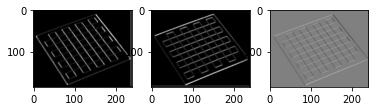

In [34]:
G = np.array([[1/16, 2/16, 1/16],[2/16, 4/16, 2/16],[1/16, 2/16, 1/16]])

Ix2 = Ix*Ix
Iy2 = Iy*Iy
Ixy = Ix*Iy

Jx2 = np.empty(shape= (height,width), dtype='float')
Jy2 = np.empty(shape= (height,width), dtype='float')
Jxy = np.empty(shape= (height,width), dtype='float')
for i in range(1,Jx2.shape[0]-1):
    for j in range(1,Jx2.shape[1]-1):
        Jx2[i-1,j-1] = np.sum(G*Ix2[i-1:i+2, j-1:j+2])
for i in range(1,Jy2.shape[0]-1):
    for j in range(1,Jy2.shape[1]-1):  
        Jy2[i-1,j-1] = np.sum(G*Iy2[i-1:i+2, j-1:j+2])
for i in range(1,Jxy.shape[0]-1):
    for j in range(1,Jxy.shape[1]-1):  
        Jxy[i-1,j-1] = np.sum(G*Ixy[i-1:i+2, j-1:j+2])

f = plt.figure()
f.add_subplot(1,3, 1)
plt.imshow(Jx2,cmap='gray')
f.add_subplot(1,3, 2)
plt.imshow(Jy2,cmap='gray')
f.add_subplot(1,3, 3)
plt.imshow(Ixy,cmap='gray')

(186, 239)
[[ 4.37386101e+10 -2.70608040e+09 -2.70608040e+09 ...  4.37386101e+10
   0.00000000e+00  0.00000000e+00]
 [-2.70608040e+09  0.00000000e+00  0.00000000e+00 ... -2.70608040e+09
   0.00000000e+00  0.00000000e+00]
 [-2.70608040e+09  0.00000000e+00  0.00000000e+00 ... -2.70608040e+09
   0.00000000e+00  0.00000000e+00]
 ...
 [ 4.37386101e+10 -2.70608040e+09 -2.70608040e+09 ...  4.37386101e+10
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


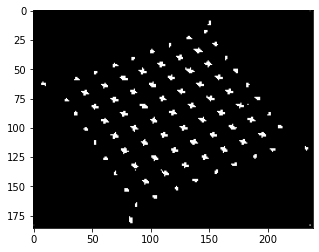

In [35]:
Ix2 = Ix*Ix
Iy2 = Iy*Iy
Ixy = Ix*Iy
R = np.empty(shape= (height,width), dtype='float')
for i in range(Jxy.shape[0]):
    for j in range(Jxy.shape[1]):
        R[i,j] = (Jx2[i,j]*Jy2[i,j]) - (Jxy[i,j]*Jxy[i,j]) - (0.04*((Jx2[i,j]+Jy2[i,j])**2))
        #R[i,j] = abs(R[i,j])
ret, mask = cv2.threshold(R, 10**8, 1, cv2.THRESH_BINARY)
print(mask.shape)
plt.imshow(mask,cmap='gray')
cv2.imwrite('corners_mask.jpg',mask)
print(R)

(186, 239)
(184, 237)


True

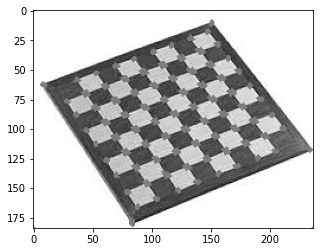

In [36]:
img = img[1:height-1,1:width-1]
height,width = img.shape
def mask_over_image(image, mask):
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i,j]==1:
                image = cv2.circle(image,(j,i), 1, 128)
    return image
duplicate = img
print(mask.shape)
print(duplicate.shape)
output = mask_over_image(img,mask)
plt.imshow(output, cmap='gray')
cv2.imwrite('output.jpg',output)